<a href="https://colab.research.google.com/github/AmeerTechsoft/Data-science-project/blob/main/Using_Artificial_Intelligence_(machine_learning)_to_scout_for_Football_Talent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary modules

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation

In [ ]:
# Load the dataset
data_2021_2022 = pd.read_csv("/content/drive/MyDrive/Football talent/2021-2022 Football Player Stats.csv",
                             encoding='ISO-8859-1', delimiter=';')
data_2022_2023 = pd.read_csv("/content/drive/MyDrive/Football talent/2022-2023 Football Player Stats.csv",
                             encoding='ISO-8859-1', delimiter=';')

In [ ]:
pd.set_option('display.max_columns', None)

####Understanding the dataset


In [ ]:
# checking the data structure for data set 2021/2022
data_2021_2022

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,32.0,0.00,0.41,0.06,15.4,0.00,0.00,20.5,0.00,0.00,0.00,34.0,45.0,75.5,574.1,214.8,17.5,19.4,90.0,13.1,17.00,77.0,3.06,6.78,45.2,0.06,0.59,1.56,1.13,0.25,2.94,45.0,34.4,10.60,0.84,0.06,5.41,0.59,1.41,0.00,0.00,0.00,0.0,26.50,9.59,8.94,4.91,29.00,0.91,9.72,0.06,34.0,0.22,0.88,1.63,1.75,1.19,0.84,0.06,0.09,0.13,0.06,0.00,0.16,0.16,0.0,0.00,0.00,0.00,0.0,2.16,1.16,1.56,0.59,0.00,1.16,1.81,63.8,0.66,13.6,3.53,26.0,7.97,4.38,1.22,2.69,0.69,0.03,2.00,1.75,3.91,2.19,0.00,58.0,5.06,23.30,23.8,15.00,0.91,47.8,1.03,2.44,42.3,1.09,0.19,33.9,199.4,121.7,5.44,1.66,0.41,0.84,0.94,36.0,32.4,89.9,1.28,0.25,0.00,0.00,0.97,1.84,0.03,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,33.1,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.00,0.00,0.00,38.7,47.0,82.4,835.8,287.9,10.2,11.4,89.9,22.4,25.00,89.4,5.65,9.15,61.7,0.00,0.24,2.45,0.18,0.00,2.72,47.0,44.0,3.02,2.45,0.00,5.68,1.66,0.06,0.00,0.00,0.00,0.0,35.30,3.78,7.95,31.70,12.10,1.48,0.42,0.12,38.7,0.15,0.97,1.24,0.88,0.63,0.42,0.00,0.09,0.03,0.00,0.09,0.03,0.00,0.0,0.03,0.00,0.00,0.0,1.87,1.39,1.24,0.60,0.03,0.39,0.82,48.1,0.42,13.6,4.89,35.9,7.61,5.14,0.88,1.87,0.79,0.06,1.09,3.11,4.98,3.20,0.00,57.3,8.28,32.80,25.7,2.90,0.85,54.5,0.48,0.66,72.7,0.48,0.03,35.7,204.7,115.5,2.75,0.73,0.00,0.45,0.39,37.5,36.3,96.9,0.36,0.15,0.03,0.00,1.30,0.73,0.00,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,27.4,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.00,0.00,0.00,55.9,61.0,91.7,1033.3,184.4,22.5,24.1,93.5,25.8,27.20,94.9,6.72,7.81,86.0,0.00,0.55,2.81,0.47,0.04,2.96,61.0,60.3,0.73,0.58,0.04,8.03,0.80,0.36,0.00,0.00,0.00,0.0,52.60,4.71,3.72,4.82,53.10,1.90,0.15,0.29,55.9,0.07,0.58,1.24,0.84,1.46,1.09,0.00,0.00,0.15,0.15,0.07,0.04,0.04,0.0,0.00,0.00,0.00,0.0,2.01,1.24,0.91,0.91,0.18,0.69,2.15,32.2,1.46,23.4,6.53,27.9,7.19,12.30,3.94,0.99,0.04,0.00,0.95,1.86,3.87,0.55,0.00,70.4,2.01,22.70,41.8,10.90,0.62,69.9,0.99,1.53,64.3,1.09,0.07,53.5,246.5,106.3,2.85,0.73,0.15,0.84,1.46,58.6,54.2,92.5,1.72,0.44,0.11,0.07,1.64,1.28,0.00,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,32.8,0.00,0.91,0.21,23.3,0.00,0.00,22.6,0.00,0.00,0.00,40.7,49.8,81.6,780.8,206.0,16.3,18.4,88.6,17.3,19.60,87.9,6.25,9.39,66.6,0.06,0.91,3.87,0.58,0.18,4.18,49.8,49.0,0.85,0.64,0.18,9.48,1.49,0.79,0.03,0.00,0.00,0.0,37.60,5.64,6.65,4.48,43.90,0.73,0.15,0.15,40.7,0.21,0.55,1.83,1.68,2.01,1.49,0.06,0.03,0.03,0.21,0.18,0.15,0.12,0.0,0.00,0.00,0.03,0.0,3.57,2.23,1.49,1.71,0.37,1.80,4.97,36.2,3.17,28.0,7.90,28.2,9.27,15.30,3.41,1.68,0.09,0.00,1.59,2.56,6.13,0.34,0.00,61.6,0.67,13.70,40.3,11.60,0.46,60.9,1.28,1.98,64.6,1.34,0.09,45.7,171.9,86.4,2.87,1.13,0.09,0.85,1.46,46.3,43.0,93.0,1.86,0.27,0.00,0.00,1.40,2.07,0.03,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles A

In [ ]:
# checking the data structure for data set 2022/2023
data_2022_2023.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


# Available Column head

    Rk : Rank
    Player : Player's name
    Nation : Player's nation
    Pos : Position
    Squad : Squad’s name
    Comp : League that squat occupies
    Age : Player's age
    Born : Year of birth
    MP : Matches played
    Starts : Matches started
    Min : Minutes played
    90s : Minutes played divided by 90
    Goals : Goals scored or allowed
    Shots : Shots total (Does not include penalty kicks)
    SoT : Shots on target (Does not include penalty kicks)
    SoT% : Shots on target percentage (Does not include penalty kicks)
    G/Sh : Goals per shot
    G/SoT : Goals per shot on target (Does not include penalty kicks)
    ShoDist : Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)
    ShoFK : Shots from free kicks
    ShoPK : Penalty kicks made
    PKatt : Penalty kicks attempted
    PasTotCmp : Passes completed
    PasTotAtt : Passes attempted
    PasTotCmp% : Pass completion percentage
    PasTotDist : Total distance, in yards, that completed passes have traveled in any direction
    PasTotPrgDist : Total distance, in yards, that completed passes have traveled towards the opponent's goal
    PasShoCmp : Passes completed (Passes between 5 and 15 yards)
    PasShoAtt : Passes attempted (Passes between 5 and 15 yards)
    PasShoCmp% : Pass completion percentage (Passes between 5 and 15 yards)
    PasMedCmp : Passes completed (Passes between 15 and 30 yards)
    PasMedAtt : Passes attempted (Passes between 15 and 30 yards)
    PasMedCmp% : Pass completion percentage (Passes between 15 and 30 yards)
    PasLonCmp : Passes completed (Passes longer than 30 yards)
    PasLonAtt : Passes attempted (Passes longer than 30 yards)
    PasLonCmp% : Pass completion percentage (Passes longer than 30 yards)
    Assists : Assists
    PasAss : Passes that directly lead to a shot (assisted shots)
    Pas3rd : Completed passes that enter the 1/3 of the pitch closest to the goal
    PPA : Completed passes into the 18-yard box
    CrsPA : Completed crosses into the 18-yard box
    PasProg : Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area
    PasAtt : Passes attempted
    PasLive : Live-ball passes
    PasDead : Dead-ball passes
    PasFK : Passes attempted from free kicks
    TB : Completed pass sent between back defenders into open space
    PasPress : Passes made while under pressure from opponent
    Sw : Passes that travel more than 40 yards of the width of the pitch
    PasCrs : Crosses
    CK : Corner kicks
    CkIn : Inswinging corner kicks
    CkOut : Outswinging corner kicks
    CkStr : Straight corner kicks
    PasGround : Ground passes
    PasLow : Passes that leave the ground, but stay below shoulder-level
    PasHigh : Passes that are above shoulder-level at the peak height
    PaswLeft : Passes attempted using left foot
    PaswRight : Passes attempted using right foot
    PaswHead : Passes attempted using head
    TI : Throw-Ins taken
    PaswOther : Passes attempted using body parts other than the player's head or feet
    PasCmp : Passes completed
    PasOff : Offsides
    PasOut : Out of bounds
    PasInt : Intercepted
    PasBlocks : Blocked by the opponent who was standing it the path
    SCA : Shot-creating actions
    ScaPassLive : Completed live-ball passes that lead to a shot attempt
    ScaPassDead : Completed dead-ball passes that lead to a shot attempt
    ScaDrib : Successful dribbles that lead to a shot attempt
    ScaSh : Shots that lead to another shot attempt
    ScaFld : Fouls drawn that lead to a shot attempt
    ScaDef : Defensive actions that lead to a shot attempt
    GCA : Goal-creating actions
    GcaPassLive : Completed live-ball passes that lead to a goal
    GcaPassDead : Completed dead-ball passes that lead to a goal
    GcaDrib : Successful dribbles that lead to a goal
    GcaSh : Shots that lead to another goal-scoring shot
    GcaFld : Fouls drawn that lead to a goal
    GcaDef : Defensive actions that lead to a goal
    Tkl : Number of players tackled
    TklWon : Tackles in which the tackler's team won possession of the ball
    TklDef3rd : Tackles in defensive 1/3
    TklMid3rd : Tackles in middle 1/3
    TklAtt3rd : Tackles in attacking 1/3
    TklDri : Number of dribblers tackled
    TklDriAtt : Number of times dribbled past plus number of tackles
    TklDri% : Percentage of dribblers tackled
    TklDriPast : Number of times dribbled past by an opposing player
    Press : Number of times applying pressure to opposing player who is receiving, carrying or releasing the ball
    PresSucc : Number of times the squad gained possession withing five seconds of applying pressure
    Press% : Percentage of time the squad gained possession withing five seconds of applying pressure
    PresDef3rd : Number of times applying pressure to opposing player who is receiving, carrying or releasing the ball, in the defensive 1/3
    PresMid3rd : Number of times applying pressure to opposing player who is receiving, carrying or releasing the ball, in the middle 1/3
    PresAtt3rd : Number of times applying pressure to opposing player who is receiving, carrying or releasing the ball, in the attacking 1/3
    Blocks : Number of times blocking the ball by standing in its path
    BlkSh : Number of times blocking a shot by standing in its path
    BlkShSv : Number of times blocking a shot that was on target, by standing in its path
    BlkPass : Number of times blocking a pass by standing in its path
    Int : Interceptions
    Tkl+Int : Number of players tackled plus number of interceptions
    Clr : Clearances
    Err : Mistakes leading to an opponent's shot
    Touches : Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch
    TouDefPen : Touches in defensive penalty area
    TouDef3rd : Touches in defensive 1/3
    TouMid3rd : Touches in middle 1/3
    TouAtt3rd : Touches in attacking 1/3
    TouAttPen : Touches in attacking penalty area
    TouLive : Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks.
    DriSucc : Dribbles completed successfully
    DriAtt : Dribbles attempted
    DriSucc% : Percentage of dribbles completed successfully
    DriPast : Number of players dribbled past
    DriMegs : Number of times a player dribbled the ball through an opposing player's legs
    Carries : Number of times the player controlled the ball with their feet
    CarTotDist : Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction
    CarPrgDist : Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal
    CarProg : Carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area
    Car3rd : Carries that enter the 1/3 of the pitch closest to the goal
    CPA : Carries into the 18-yard box
    CarMis : Number of times a player failed when attempting to gain control of a ball
    CarDis : Number of times a player loses control of the ball after being tackled by an opposing player
    RecTarg : Number of times a player was the target of an attempted pass
    Rec : Number of times a player successfully received a pass
    Rec% : Percentage of time a player successfully received a pass
    RecProg : Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area
    CrdY : Yellow cards
    CrdR : Red cards
    2CrdY : Second yellow card
    Fls : Fouls committed
    Fld : Fouls drawn
    Off : Offsides
    Crs : Crosses
    TklW : Tackles in which the tackler's team won possession of the ball
    PKwon : Penalty kicks won
    PKcon : Penalty kicks conceded
    OG : Own goals
    Recov : Number of loose balls recovered
    AerWon : Aerials won
    AerLost : Aerials lost
    AerWon% : Percentage of aerials won


In [ ]:
# Adding Season to differentiate the data once merged
data_2021_2022['Season'] = '2021/2022'
data_2022_2023['Season'] = '2022/2023'

In [ ]:
#converting the column heads into a list
data_2021_2022_columns = data_2021_2022.columns.tolist()
data_2022_2023_columns = data_2022_2023.columns.tolist()

In [ ]:
# printing column heads for each season
print(data_2021_2022_columns)
print(data_2022_2023_columns)

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'PasPress', 'Sw', 'PasCrs', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasGround', 'PasLow', 'PasHigh', 'PaswLeft', 'PaswRight', 'PaswHead', 'TI', 'PaswOther', 'PasCmp', 'PasOff', 'PasOut', 'PasInt', 'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Press', 'PresSucc', 'Press%', 'PresDef3rd', 'PresMid3rd', 

In [ ]:
# the size of 2021/2022 size
data_2021_2022.shape

(2921, 144)

In [ ]:
# the size of 2022/2023 size
data_2022_2023.shape

(2689, 125)

In [ ]:
#data structure if 2021/2022 data
print(data_2021_2022.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Data columns (total 144 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Rk             int64  
 1    Player         object 
 2    Nation         object 
 3    Pos            object 
 4    Squad          object 
 5    Comp           object 
 6    Age            float64
 7    Born           int64  
 8    MP             int64  
 9    Starts         int64  
 10   Min            int64  
 11   90s            float64
 12   Goals          float64
 13   Shots          float64
 14   SoT            float64
 15   SoT%           float64
 16   G/Sh           float64
 17   G/SoT          float64
 18   ShoDist        float64
 19   ShoFK          float64
 20   ShoPK          float64
 21   PKatt          float64
 22   PasTotCmp      float64
 23   PasTotAtt      float64
 24   PasTotCmp%     float64
 25   PasTotDist     float64
 26   PasTotPrgDist  float64
 27   PasShoCmp      float64
 28   PasShoAtt      f

In [ ]:
#data structure if 2022/2022 data
data_2022_2023.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 125 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Rk             int64  
 1    Player         object 
 2    Nation         object 
 3    Pos            object 
 4    Squad          object 
 5    Comp           object 
 6    Age            int64  
 7    Born           int64  
 8    MP             int64  
 9    Starts         int64  
 10   Min            int64  
 11   90s            float64
 12   Goals          int64  
 13   Shots          float64
 14   SoT            float64
 15   SoT%           float64
 16   G/Sh           float64
 17   G/SoT          float64
 18   ShoDist        float64
 19   ShoFK          float64
 20   ShoPK          float64
 21   PKatt          float64
 22   PasTotCmp      float64
 23   PasTotAtt      float64
 24   PasTotCmp%     float64
 25   PasTotDist     float64
 26   PasTotPrgDist  float64
 27   PasShoCmp      float64
 28   PasShoAtt      f

In [ ]:
#statistical description of the 2021/2022 data
data_2021_2022.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2921.000000,2920.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.00000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,1461.000000,26.092123,1994.725094,18.800068,13.749743,1234.756248,13.719069,0.111274,1.220431,0.391462,23.618179,0.064957,0.189213,13.727867,0.036898,0.007857,0.010339,33.154201,42.023215,76.444882,632.430880,205.043413,14.030448,16.180202,84.667169,13.751763,16.156166,80.581890,4.657254,7.860346,55.855666,0.088658,0.825399,2.289130,0.720835,0.197405,2.692071,42.023215,37.967994,4.056460,1.013869,0.066053,6.464947,1.141335,1.063708,0.399178,0.165974,0.142236,0.016001,28.332667,5.592965,8.098792,12.424166,24.278562,1.680685,1.841510,0.571664,33.154201,0.131044,0.749394,1.319459,1.116299,1.809415,1.307812,0.152119,0.100496,0.098042,0.102088,0.048726,0.192602,0.131452,0.011157,0.013810,0.015837,0.015861,0.004362,1.689172,1.026689,0.793581,0.652372,0.243345,0.589165,1.486303,33.346217,0.897135,15.231503,4.368990,27.987573,4.709428,6.697669,3.824064,1.412872,0.296922,0.005433,1.116025,1.336398,3.025587,1.614019,0.022944,53.281171,5.305084,16.734307,25.084584,14.664964,2.377874,49.347484,0.833947,1.581900,46.017357,0.920873,0.081808,33.431941,168.915406,89.958750,3.681325,1.110777,0.394974,1.367063,1.210828,41.197689,34.299045,83.760870,3.307333,0.229979,0.010448,0.003927,1.429887,1.275015,0.195029,1.063708,1.026689,0.01519,0.013050,0.003451,7.410294,1.664286,1.858305,40.485861
std,843.364393,4.641

In [ ]:
# statistical description of the 2022/2023 data
data_2022_2023.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.00000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,24.222164,0.064210,0.167374,14.141726,0.035920,0.008111,0.010945,33.348204,42.701882,75.489773,577.364187,198.385950,15.389275,17.784968,84.270807,13.590718,16.197352,78.697285,3.269732,5.964154,51.159799,0.083466,0.866936,2.529621,0.738103,0.197713,3.331097,42.701882,38.572090,3.955508,1.005110,0.108167,0.312916,1.661636,1.832904,0.41315,0.175627,0.157441,0.003079,33.348204,0.173871,0.913009,2.071179,1.498059,0.167683,0.112588,0.14881,0.108676,0.035459,0.209583,0.144102,0.010242,0.013942,0.026021,0.012622,0.00267,1.701655,0.990569,0.816422,0.648635,0.236664,0.750398,1.444533,44.535106,0.694080,1.079762,0.275385,0.804522,0.820331,2.521261,1.574704,0.022350,53.651023,4.613027,15.713856,24.237754,14.262763,2.161078,53.639903,1.817869,0.729093,34.399702,0.860033,37.415210,31.611711,170.765946,82.638732,1.679989,1.270476,0.434883,1.682049,1.056794,34.369636,3.970714,0.246222,0.020688,0.006761,1.319788,1.146991,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,24.249242,0.118826,0.263501,8.677582,0.198595,0.041589,0.051776,17.027779,18.447543,13.113075,324.007185,145.782161,8.486637,9.050574,15.280160,9.142460,9.683369,19.294651,2.952956,4.975162,24.030708,0.276581,1.078650,2.207206,1.065411,0.518301,2.629106,18.447543,17.567568,4.005617,1.176429,0.381662,0.566358,2.319000,3.333445,1.07893,0.643655,0.504091,0.028629,17.027779,0.407284,1.087060,1.913766,1.453089,0.480929,0.447581,0.45827,0.270573,0.156976,0.462712,0.344309,0.052678,0.136515,0.249190,0.0548

In [ ]:
# Checking for null values
data_2021_2022.isnull().sum().sum()

2

In [ ]:
# Printing columns with missing values
data_2021_2022.columns[data_2021_2022.isnull().any()].tolist()

['Nation', 'Age']

In [ ]:
# Checking for null values
data_2022_2023.isnull().sum().sum()

1

In [ ]:
# Printing columns with missing values
data_2022_2023.columns[data_2022_2023.isnull().any()].tolist()

['Nation']

In [ ]:
# Number of Unique player position 2021/2022
data_2021_2022['Pos'].nunique()

11

In [ ]:
# Unique Value player position 2021/2022
data_2021_2022['Pos'].unique()

array(['DF', 'MF', 'FW', 'MFFW', 'FWMF', 'GK', 'DFMF', 'FWDF', 'MFDF',
       'DFFW', 'GKMF'], dtype=object)

In [ ]:
# Number of Unique player position 2022/2023
data_2022_2023['Pos'].nunique()

10

In [ ]:
# Unique Value player position 2022/2023
data_2022_2023['Pos'].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'GK', 'DFMF',
       'FWDF'], dtype=object)

In [ ]:
# Common featues bwtween both dataset
common_features = set(data_2021_2022.columns).intersection(set(data_2022_2023.columns))

In [ ]:
# Print common Features
common_features

{'2CrdY',
 '90s',
 'AerLost',
 'AerWon',
 'AerWon%',
 'Age',
 'Assists',
 'BlkPass',
 'BlkSh',
 'Blocks',
 'Born',
 'CK',
 'CPA',
 'Car3rd',
 'CarDis',
 'CarMis',
 'CarPrgDist',
 'CarProg',
 'CarTotDist',
 'Carries',
 'CkIn',
 'CkOut',
 'CkStr',
 'Clr',
 'Comp',
 'CrdR',
 'CrdY',
 'Crs',
 'CrsPA',
 'Err',
 'Fld',
 'Fls',
 'G/Sh',
 'G/SoT',
 'GCA',
 'GcaDef',
 'GcaDrib',
 'GcaFld',
 'GcaPassDead',
 'GcaPassLive',
 'GcaSh',
 'Goals',
 'Int',
 'MP',
 'Min',
 'Nation',
 'OG',
 'Off',
 'PKatt',
 'PKcon',
 'PKwon',
 'PPA',
 'Pas3rd',
 'PasAss',
 'PasAtt',
 'PasBlocks',
 'PasCmp',
 'PasCrs',
 'PasDead',
 'PasFK',
 'PasLive',
 'PasLonAtt',
 'PasLonCmp',
 'PasLonCmp%',
 'PasMedAtt',
 'PasMedCmp',
 'PasMedCmp%',
 'PasOff',
 'PasProg',
 'PasShoAtt',
 'PasShoCmp',
 'PasShoCmp%',
 'PasTotAtt',
 'PasTotCmp',
 'PasTotCmp%',
 'PasTotDist',
 'PasTotPrgDist',
 'Player',
 'Pos',
 'Rec',
 'RecProg',
 'Recov',
 'Rk',
 'SCA',
 'ScaDef',
 'ScaDrib',
 'ScaFld',
 'ScaPassDead',
 'ScaPassLive',
 'ScaSh',
 'Seas

In [ ]:
# merging both datasets together
data_concatenated = pd.concat([data_2021_2022, data_2022_2023])

In [ ]:
# Filling empy  cells and NaN with 0
data_concatenated.fillna(0)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,PasPress,Sw,PasCrs,CK,CkIn,CkOut,CkStr,PasGround,PasLow,PasHigh,PaswLeft,PaswRight,PaswHead,TI,PaswOther,PasCmp,PasOff,PasOut,PasInt,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Press,PresSucc,Press%,PresDef3rd,PresMid3rd,PresAtt3rd,Blocks,BlkSh,BlkShSv,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,DriSucc,DriAtt,DriSucc%,DriPast,DriMegs,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,RecTarg,Rec,Rec%,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,Season,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,2881,32.0,0.00,0.41,0.06,15.4,0.00,0.00,20.5,0.00,0.0,0.0,34.0,45.0,75.5,574.1,214.8,17.5,19.4,90.0,13.10,17.00,77.0,3.06,6.78,45.2,0.06,0.59,1.56,1.13,0.25,2.94,45.0,34.4,10.60,0.84,0.06,5.41,0.59,1.41,0.00,0.00,0.00,0.00,26.5,9.59,8.94,4.91,29.0,0.91,9.72,0.06,34.0,0.22,0.88,1.63,1.75,1.19,0.84,0.06,0.09,0.13,0.06,0.00,0.16,0.16,0.0,0.00,0.00,0.00,0.0,2.16,1.16,1.56,0.59,0.00,1.16,1.81,63.8,0.66,13.6,3.53,26.0,7.97,4.38,1.22,2.69,0.69,0.03,2.00,1.75,3.91,2.19,0.0,58.0,5.06,23.30,23.8,15.0,0.91,47.8,1.03,2.44,42.3,1.09,0.19,33.9,199.4,121.7,5.44,1.66,0.41,0.84,0.94,36.0,32.4,89.9,1.28,0.25,0.00,0.00,0.97,1.84,0.03,1.41,1.16,0.0,0.06,0.03,5.53,0.47,1.59,22.7,2021/2022,0.00,0.00,0.0,0.00,0.0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,2983,33.1,0.06,0.54,0.18,33.3,0.11,0.33,18.7,0.00,0.0,0.0,38.7,47.0,82.4,835.8,287.9,10.2,11.4,89.9,22.40,25.00,89.4,5.65,9.15,61.7,0.00,0.24,2.45,0.18,0.00,2.72,47.0,44.0,3.02,2.45,0.00,5.68,1.66,0.06,0.00,0.00,0.00,0.00,35.3,3.78,7.95,31.70,12.1,1.48,0.42,0.12,38.7,0.15,0.97,1.24,0.88,0.63,0.42,0.00,0.09,0.03,0.00,0.09,0.03,0.00,0.0,0.03,0.00,0.00,0.0,1.87,1.39,1.24,0.60,0.03,0.39,0.82,48.1,0.42,13.6,4.89,35.9,7.61,5.14,0.88,1.87,0.79,0.06,1.09,3.11,4.98,3.20,0.0,57.3,8.28,32.80,25.7,2.9,0.85,54.5,0.48,0.66,72.7,0.48,0.03,35.7,204.7,115.5,2.75,0.73,0.00,0.45,0.39,37.5,36.3,96.9,0.36,0.15,0.03,0.00,1.30,0.73,0.00,0.06,1.39,0.0,0.03,0.00,6.77,2.02,1.36,59.8,2021/2022,0.00,0.00,0.0,0.00,0.0
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,2462,27.4,0.04,0.66,0.18,27.8,0.06,0.20,20.3,0.00,0.0,0.0,55.9,61.0,91.7,1033.3,184.4,22.5,24.1,93.5,25.80,27.20,94.9,6.72,7.81,86.0,0.00,0.55,2.81,0.47,0.04,2.96,61.0,60.3,0.73,0.58,0.04,8.03,0.80,0.36,0.00,0.00,0.00,0.00,52.6,4.71,3.72,4.82,53.1,1.90,0.15,0.29,55.9,0.07,0.58,1.24,0.84,1.46,1.09,0.00,0.00,0.15,0.15,0.07,0.04,0.04,0.0,0.00,0.00,0.00,0.0,2.01,1.24,0.91,0.91,0.18,0.69,2.15,32.2,1.46,23.4,6.53,27.9,7.19,12.30,3.94,0.99,0.04,0.00,0.95,1.86,3.87,0.55,0.0,70.4,2.01,22.70,41.8,10.9,0.62,69.9,0.99,1.53,64.3,1.09,0.07,53.5,246.5,106.3,2.85,0.73,0.15,0.84,1.46,58.6,54.2,92.5,1.72,0.44,0.11,0.07,1.64,1.28,0.00,0.36,1.24,0.0,0.00,0.00,8.76,0.88,0.88,50.0,2021/2022,0.00,0.00,0.0,0.00,0.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,2956,32.8,0.00,0.91,0.21,23.3,0.00,0.00,22.6,0.00,0.0,0.0,40.7,49.8,81.6,780.8,206.0,16.3,18.4,88.6,17.30,19.60,87.9,6.25,9.39,66.6,0.06,0.91,3.87,0.58,0.18,4.18,49.8,49.0,0.85,0.64,0.18,9.48,1.49,0.79,0.03,0.00,0.00,0.00,37.6,5.64,6.65,4.48,43.9,0.73,0.15,0.15,40.7,0.21,0.55,1.83,1.68,2.01,1.49,0.06,0.03,0.03,0.21,0.18,0.15,0.12,0.0,0.00,0.00,0.03,0.0,3.57,2.23,1.49,1.71,0.37,1.80,4.97,36.2,3.17,28.0,7.90,28.2,9.27,15.30,3.41,1.68,0.09,0.00,1.59,2.56,6.13,0.34,0.0,61.6,0.67,13.70,40.3,11.6,0.46,60.9,1.28,1.98,64.6,1.34,0.09,45.7,171.9,86.4,2.87,1.13,0.09

In [ ]:
data_concatenated.isna().sum()

Rk           0
Player       0
Nation       2
Pos          0
Squad        0
          ... 
ToAtt     2921
ToSuc     2921
ToSuc%    2921
ToTkl     2921
ToTkl%    2921
Length: 149, dtype: int64

In [ ]:
data_concatenated['Player'].unique().tolist()

['Max Aarons',
 'Yunis Abdelhamid',
 'Salis Abdul Samed',
 'Laurent Abergel',
 'Charles Abi',
 'Dickson Abiama',
 'Matthis Abline',
 'Tammy Abraham',
 'Luis Abram',
 'Francesco Acerbi',
 'Ragnar Ache',
 'Mohamed Achi',
 'Marcos Acuña',
 'Che Adams',
 'Tyler Adams',
 'Sargis Adamyan',
 'Martin Adeline',
 'Amine Adli',
 'Yacine Adli',
 'Michel Aebischer',
 'Felix Afena-Gyan',
 'Martin Agirregabiria',
 'Julen Agirrezabala',
 'Lucien Agoume',
 'Kevin Agudelo',
 'Nayef Aguerd',
 'Sergio Agüero',
 'Ruben Aguilar',
 'Álvaro Aguirre',
 'Naouirou Ahamada',
 'Anel Ahmedhodzic',
 'Jean-Eudes Aholou',
 'Joseph Aidoo',
 'Ola Aina',
 'Rayan Aït Nouri',
 'Kristoffer Ajer',
 'Ludovic Ajorque',
 'Manuel Akanji',
 'Carlos Akapo',
 'Marley Aké',
 'Nathan Aké',
 'Ilias Akhomach',
 'Maghnes Akliouche',
 'Paul Akouokou',
 'Jean-Daniel Akpa-Akpro',
 'Kevin Akpoguma',
 'David Alaba',
 'Sofiane Alakouch',
 'Tomás Alarcón',
 'Lucas Alario',
 'Jordi Alba',
 'Josué Albert',
 'Luis Alberto',
 'Raúl Albiol',
 'Marc

In [ ]:
# Checking For duplicated data using the player column
data_concatenated['Player'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2684     True
2685     True
2686     True
2687     True
2688     True
Name: Player, Length: 5610, dtype: bool

In [ ]:
# Getting a count of the different positions available
data_concatenated['Pos'].value_counts()

Pos
DF      1767
MF      1206
FW       828
FWMF     551
MFFW     447
GK       380
DFMF     167
MFDF     130
DFFW      73
FWDF      60
GKMF       1
Name: count, dtype: int64

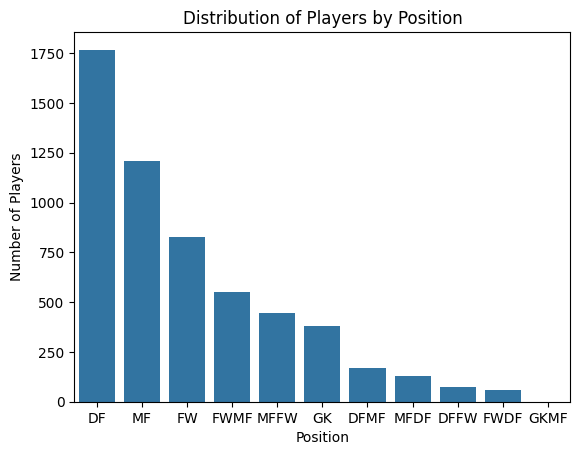

In [ ]:
# Count of players in each position
pos_counts = data_concatenated['Pos'].value_counts()

# Plotting the counts using a bar chart
sns.barplot(x=pos_counts.index, y=pos_counts.values)
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Distribution of Players by Position')
plt.show()

Text(0.5, 1.0, 'Scatter Plot of Position')

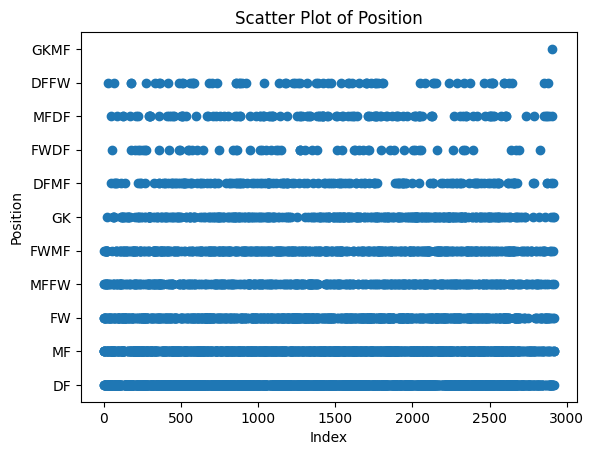

In [ ]:
plt.scatter(data_concatenated.index, data_concatenated['Pos'])

# Add labels and title
plt.xlabel("Index")
plt.ylabel("Position")
plt.title("Scatter Plot of Position")

In [ ]:
print('Oldest Player: ', data_concatenated['Age'].max())
print('Youngest Player: ',data_concatenated['Age'].min())

Oldest Player:  41.0
Youngest Player:  15.0


In [ ]:
data_concatenated['Age'].isnull().sum()

1

In [ ]:
data_concatenated.dropna(subset=['Age'], inplace=True)

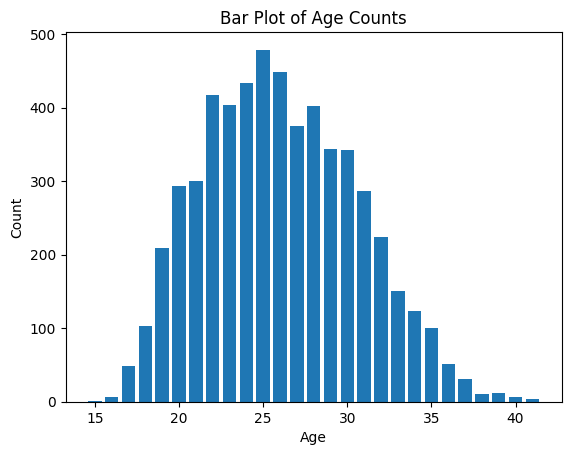

In [ ]:

# Get unique values of Age
unique_ages = data_concatenated['Age'].unique()

# Create a dictionary to store counts of each unique age
age_counts = {}
for age in unique_ages:
    age_counts[age] = 0

# Count the occurrences of each unique age
for age in data_concatenated['Age']:
    age_counts[age] += 1

# Create the bar plot
plt.bar(list(age_counts.keys()), list(age_counts.values()))

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Bar Plot of Age Counts")

# Show the plot
plt.show()

Filtering Out Features needed for the prediction

In [ ]:
# clustering a list of data for each  to reduce curse of dimentionality
general_info = ["Player", "Nation", "Pos", "Squad", "Age", "Born"]
playing_time = ["MP", "Starts", "Min"]
goals_info = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "ShoPK", "PKatt", "GCA",
              "SCA", "Off", "PKwon", "PKcon"]

passes_info = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Assists",
               "PasAss", "Pas3rd", "PPA", "PasCrs", "CrsPA", "PasAtt", "PasLive", "PasDead", "PasOff",
              "PasBlocks", "Crs"]
skill_info = ["SCA", "ScaDrib", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", "Car3rd", 'CPA', "CarMis", "CarDis", "Fld"]
defense_info = ["Tkl", "TklWon", "TklDri", "Blocks", "Int", "Clr", "Err", "CrdY", "CrdR", "Fls", "OG", "Recov", "AerWon",
             "AerLost"]

In [ ]:
# Selecting a list of features for the major positions in the dataset
forward_features_reduced = ["Goals", "Shots", "SCA", "MP", "Assists", "Car3rd", "ScaFld", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "ScaDrib"]
midfielder_features_reduced = ["Goals","PasTotCmp", "Assists", "MP", "PasAss", "Pas3rd", "Crs", "PasCmp", "SCA", "ScaDrib", "GCA", "Tkl", "TklWon", "TklDri",
                       "TklDriAtt", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarPrgDist" , "Fld"]
defender_features_reduced = ["MP", "PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr"]

In [ ]:
# specifying the values to classify for each player possition
forward_position = ["FW", "FWMF", "FWDF"]
midfield_position = ["MF", "MFDF", "MFFW"]
defender_position = ["DF", "DFMF", "DFFW"]
goalkeeper_position = ["GK", 'GKMF']

Clustering the Players by their Position

In [ ]:
# foward players dataframe
data_forwards = data_concatenated[data_concatenated['Pos'].isin(forward_position)]

print(data_forwards.head)
print(data_forwards.shape)

<bound method NDFrame.head of         Rk          Player Nation   Pos           Squad            Comp   Age  \
4        5     Charles Abi    FRA    FW   Saint-Étienne         Ligue 1  22.0   
5        6  Dickson Abiama    NGA    FW  Greuther Fürth      Bundesliga  23.0   
6        7  Matthis Abline    FRA    FW          Rennes         Ligue 1  19.0   
7        8   Tammy Abraham    ENG    FW            Roma         Serie A  24.0   
13      14       Che Adams    SCO    FW     Southampton  Premier League  25.0   
...    ...             ...    ...   ...             ...             ...   ...   
2670  2671   Edon Zhegrova    KVX  FWDF           Lille         Ligue 1  23.0   
2674  2675  Joshua Zirkzee    NED    FW         Bologna         Serie A  21.0   
2675  2676    Hakim Ziyech    MAR  FWMF         Chelsea  Premier League  29.0   
2677  2678    Simon Zoller    GER    FW          Bochum      Bundesliga  31.0   
2687  2688     Milan ?uri?    BIH    FW   Hellas Verona         Serie A  32.0  

In [ ]:
# Mildfield players dataframe
data_midfielders = data_concatenated[data_concatenated['Pos'].isin(midfield_position)]
print(data_midfielders.head)
print(data_midfielders.shape)

<bound method NDFrame.head of         Rk             Player Nation   Pos           Squad            Comp  \
2        3  Salis Abdul Samed    GHA    MF   Clermont Foot         Ligue 1   
3        4    Laurent Abergel    FRA    MF         Lorient         Ligue 1   
10      11        Ragnar Ache    GER  MFFW  Eint Frankfurt      Bundesliga   
11      12       Mohamed Achi    FRA    MF          Nantes         Ligue 1   
14      15        Tyler Adams    USA    MF      RB Leipzig      Bundesliga   
...    ...                ...    ...   ...             ...             ...   
2683  2684   Martín Zubimendi    ESP    MF   Real Sociedad         La Liga   
2684  2685   Szymon ?urkowski    POL    MF      Fiorentina         Serie A   
2685  2686   Szymon ?urkowski    POL    MF          Spezia         Serie A   
2686  2687    Martin Ødegaard    NOR    MF         Arsenal  Premier League   
2688  2689      Filip ?uri?i?    SRB  MFFW       Sampdoria         Serie A   

       Age  Born  MP  Starts   Mi

In [ ]:
# Defence players dataframe
data_defenders = data_concatenated[data_concatenated['Pos'].isin(defender_position)]
print(data_defenders.head)
print(data_defenders.shape)

<bound method NDFrame.head of         Rk               Player Nation   Pos          Squad            Comp  \
0        1           Max Aarons    ENG    DF   Norwich City  Premier League   
1        2     Yunis Abdelhamid    MAR    DF          Reims         Ligue 1   
8        9           Luis Abram    PER    DF        Granada         La Liga   
9       10     Francesco Acerbi    ITA    DF          Lazio         Serie A   
12      13         Marcos Acuña    ARG    DF        Sevilla         La Liga   
...    ...                  ...    ...   ...            ...             ...   
2673  2674  Oleksandr Zinchenko    UKR    DF        Arsenal  Premier League   
2678  2679         Nadir Zortea    ITA  DFMF       Atalanta         Serie A   
2679  2680         Nadir Zortea    ITA    DF       Sassuolo         Serie A   
2680  2681           Kurt Zouma    FRA    DF       West Ham  Premier League   
2682  2683        Igor Zubeldia    ESP    DF  Real Sociedad         La Liga   

       Age  Born  MP 

In [ ]:
#GoalKeepers Dataframe
data_goalkeeper = data_concatenated[data_concatenated['Pos'].isin(goalkeeper_position)]
print(data_goalkeeper.head)
print(data_goalkeeper.shape)

<bound method NDFrame.head of         Rk              Player Nation Pos           Squad            Comp  \
22      23  Julen Agirrezabala    ESP  GK   Athletic Club         La Liga   
60      61       Doðan Alemdar    TUR  GK          Rennes         Ligue 1   
65      66             Alisson    BRA  GK       Liverpool  Premier League   
115    116     Alphonse Areola    FRA  GK        West Ham  Premier League   
123    124   Kepa Arrizabalaga    ESP  GK         Chelsea  Premier League   
...    ...                 ...    ...  ..             ...             ...   
2586  2587          Danny Ward    WAL  GK  Leicester City  Premier League   
2666  2667       Robin Zentner    GER  GK        Mainz 05      Bundesliga   
2668  2669    Michael Zetterer    GER  GK   Werder Bremen      Bundesliga   
2676  2677         Jeroen Zoet    NED  GK          Spezia         Serie A   
2681  2682         Petar Zovko    BIH  GK          Spezia         Serie A   

       Age  Born  MP  Starts   Min   90s  Goa

#EDA

## EDA for foward players

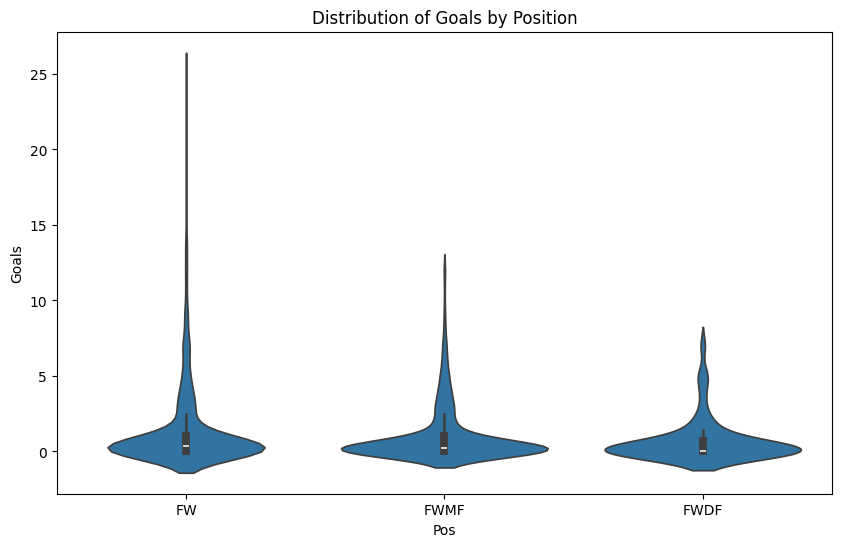

In [ ]:
#distribution of goals by their position
plt.figure(figsize=(10, 6))
sns.violinplot(
    x = "Pos",
    y = "Goals",
    data=data_forwards
)
plt.title('Distribution of Goals by Position')
plt.show()

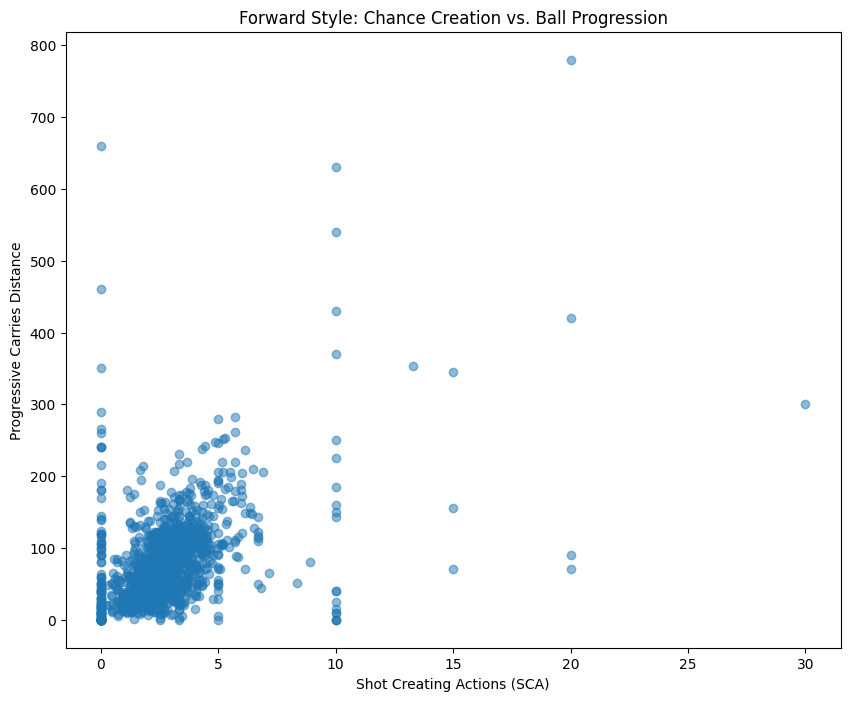

In [ ]:
# Pairwise Scatterplots (for style analysis)
plt.figure(figsize=(10, 8))  # Larger figure size
plt.scatter(data_forwards['SCA'], data_forwards['CarPrgDist'], alpha=0.5)  # Adjust alpha for visibility
plt.xlabel('Shot Creating Actions (SCA)')
plt.ylabel('Progressive Carries Distance')
plt.title('Forward Style: Chance Creation vs. Ball Progression')
plt.show()

In [ ]:
# Shot converted to goals
data_forwards['ShotConv'] = data_forwards['Goals'] / data_forwards['Shots']

<ipython-input-46-6854c61652f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_forwards['ShotConv'] = data_forwards['Goals'] / data_forwards['Shots']


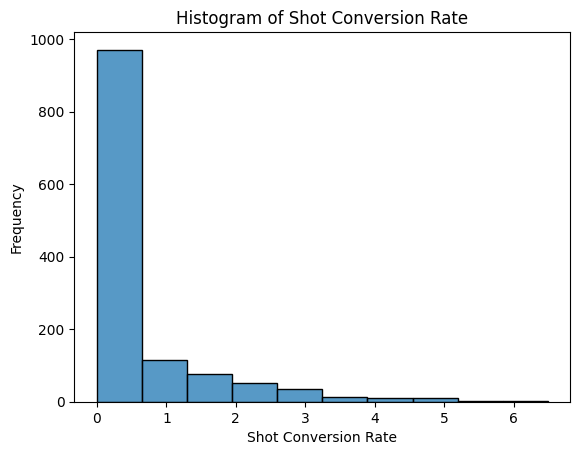

In [ ]:
# Create the histogram of ShotConv
sns.histplot(data_forwards['ShotConv'], bins=10)
plt.xlabel("Shot Conversion Rate")
plt.ylabel("Frequency")
plt.title("Histogram of Shot Conversion Rate")
plt.show()

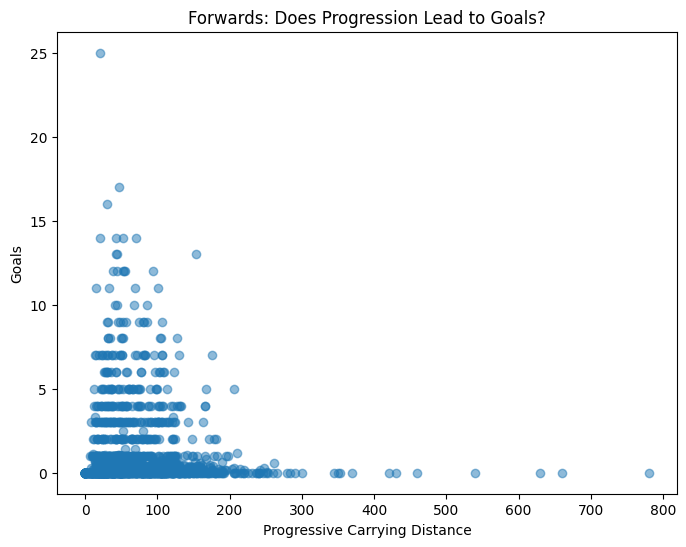

In [ ]:
#Foward Progression to goals
plt.figure(figsize=(8, 6))
plt.scatter(data_forwards['CarPrgDist'], data_forwards['Goals'], alpha=0.5)
plt.xlabel('Progressive Carrying Distance')
plt.ylabel('Goals')
plt.title('Forwards: Does Progression Lead to Goals?')
plt.show()

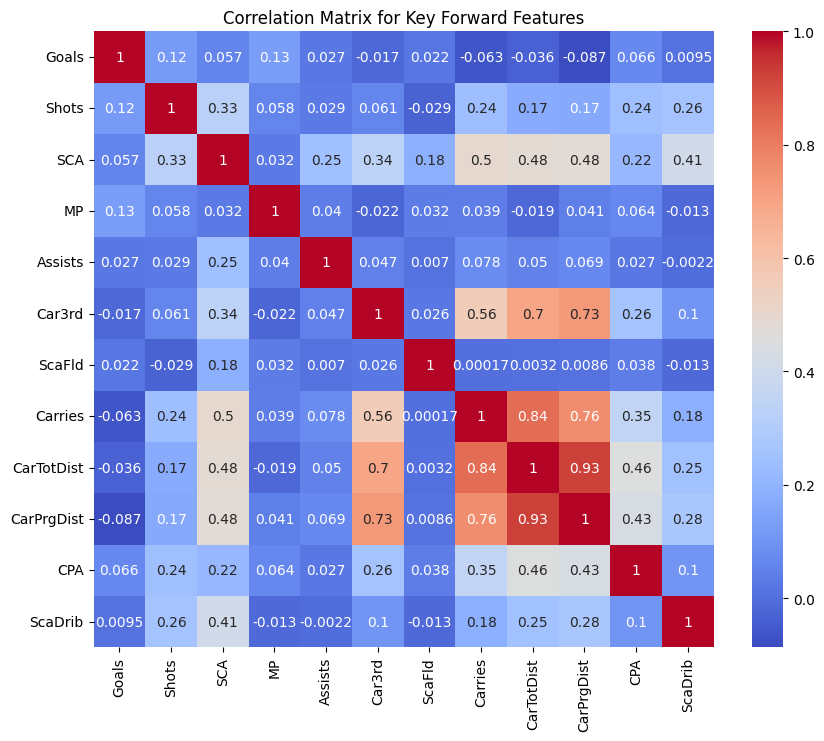

In [ ]:
# correlation Matrix for forward features
plt.figure(figsize=(10, 8))
sns.heatmap(data_forwards[forward_features_reduced].corr(), annot=True, cmap='coolwarm')  # 'coolwarm' colormap for visibility
plt.title('Correlation Matrix for Key Forward Features')
plt.show()

##EDA for mildfielders

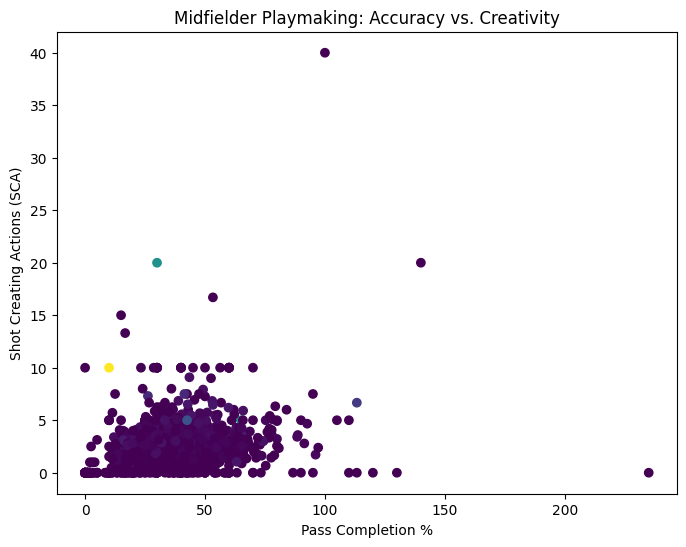

In [ ]:
# Mildfielders accuracy and creativity
plt.figure(figsize=(8, 6))
plt.scatter(data_midfielders['PasTotCmp'], data_midfielders['SCA'], c=data_midfielders['Assists'], cmap='viridis')
plt.xlabel('Pass Completion %')
plt.ylabel('Shot Creating Actions (SCA)')
plt.title('Midfielder Playmaking: Accuracy vs. Creativity')
plt.show()

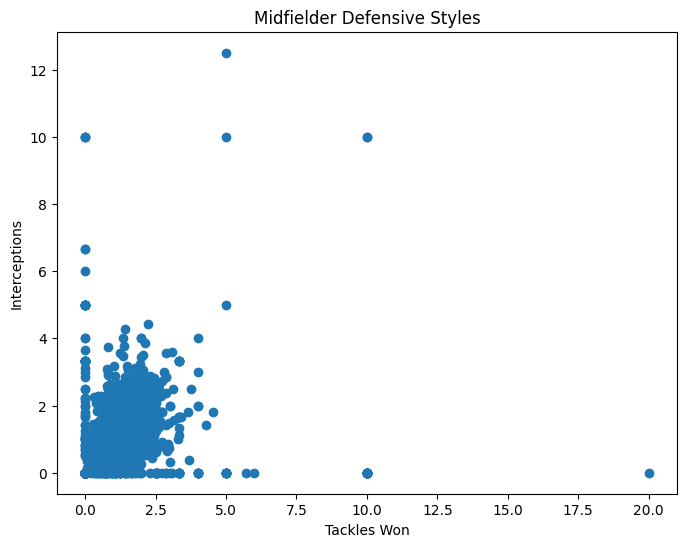

In [ ]:
# Tackles won Distribution
plt.figure(figsize=(8, 6))
plt.scatter(data_midfielders['TklWon'], data_midfielders['Int'])
plt.xlabel('Tackles Won')
plt.ylabel('Interceptions')
plt.title('Midfielder Defensive Styles')
plt.show()

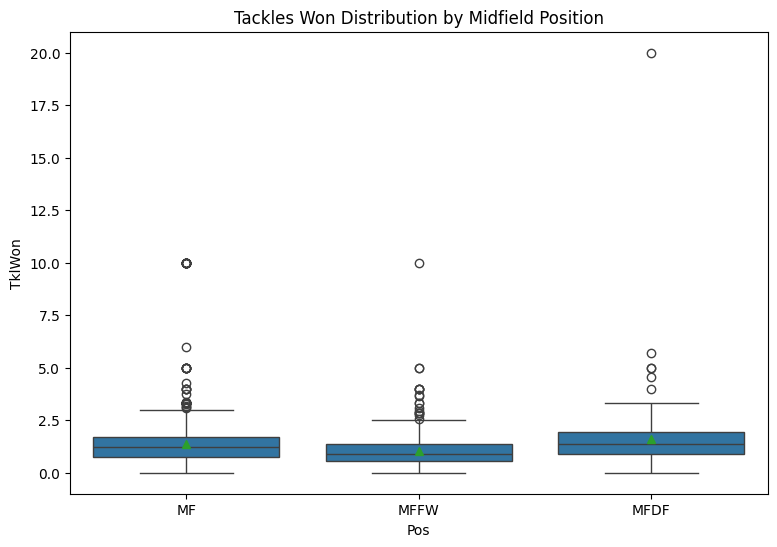

In [ ]:
# Distribution of tackles won by mild field
plt.figure(figsize=(9, 6))
sns.boxplot(
    x = "Pos",
    y = "TklWon",
    showmeans=True,
    data=data_midfielders
)
plt.title('Tackles Won Distribution by Midfield Position')
plt.show()

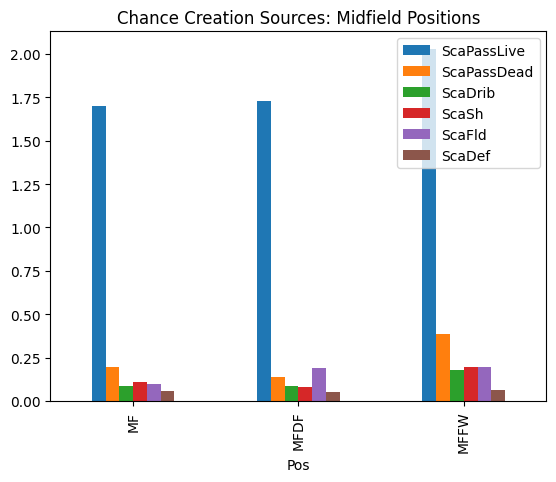

In [ ]:
# Chance Creation Sources
sca_sources = data_midfielders.groupby('Pos')[['ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh', 'ScaFld', 'ScaDef']].mean()
sca_sources.plot.bar(stacked=False)
plt.title('Chance Creation Sources: Midfield Positions')
plt.show()


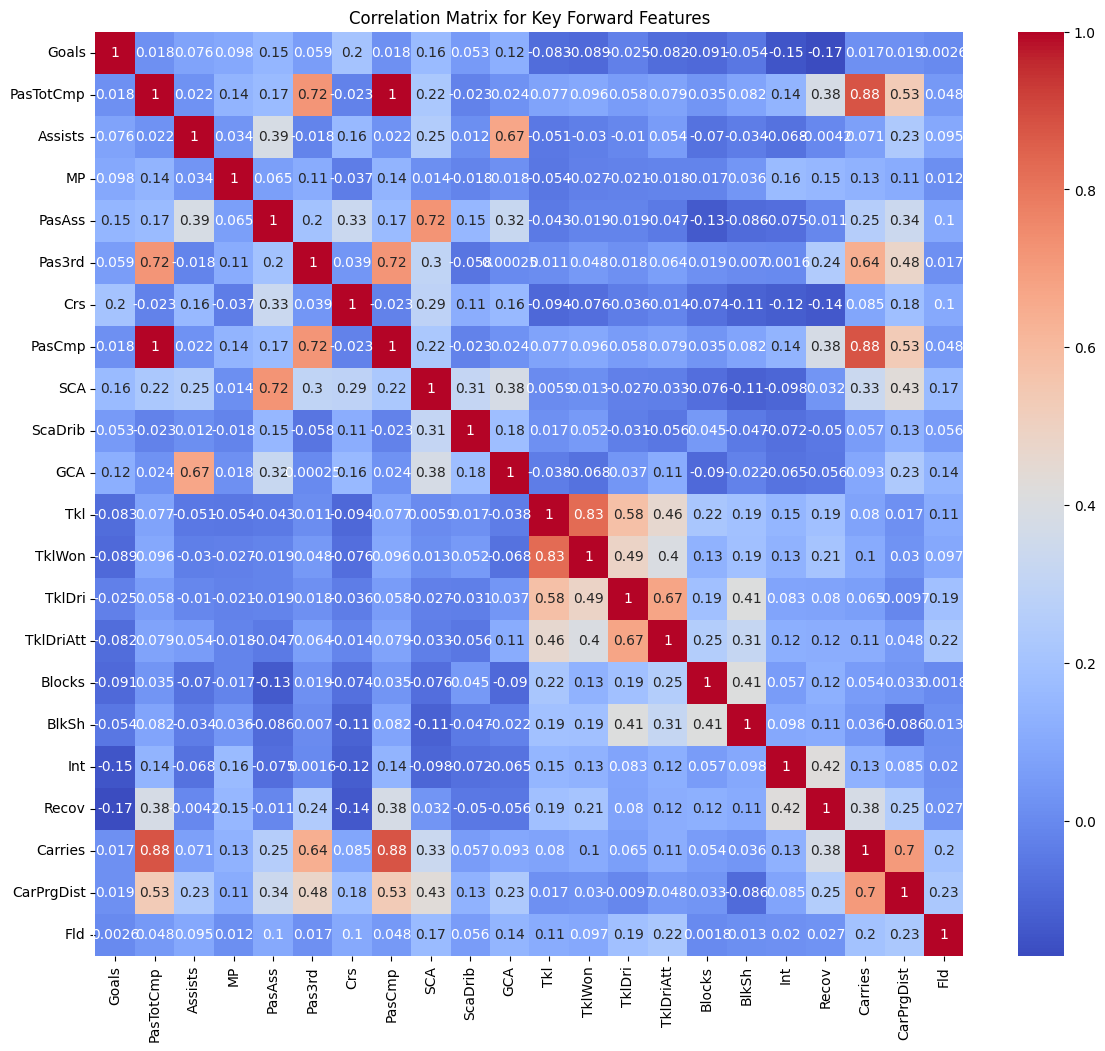

In [ ]:
# Corellation Matrix for Mildfield  features
plt.figure(figsize=(14, 12))
sns.heatmap(data_midfielders[midfielder_features_reduced].corr(), annot=True, cmap='coolwarm')  # 'coolwarm' colormap for visibility
plt.title('Correlation Matrix for Key Forward Features')
plt.show()

## EDA Defenders

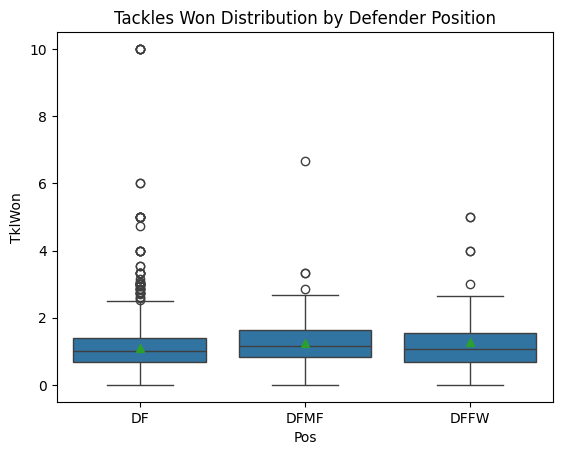

In [ ]:
sns.boxplot(
    x = "Pos",
    y = "TklWon",
    showmeans=True,
    data=data_defenders
)
plt.title('Tackles Won Distribution by Defender Position')
plt.show()

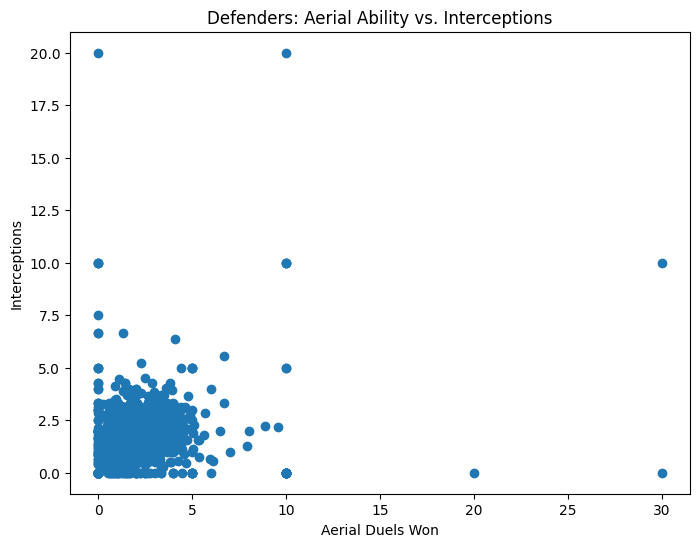

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_defenders['AerWon'], data_defenders['Int'])
plt.xlabel('Aerial Duels Won')
plt.ylabel('Interceptions')
plt.title('Defenders: Aerial Ability vs. Interceptions')
plt.show()

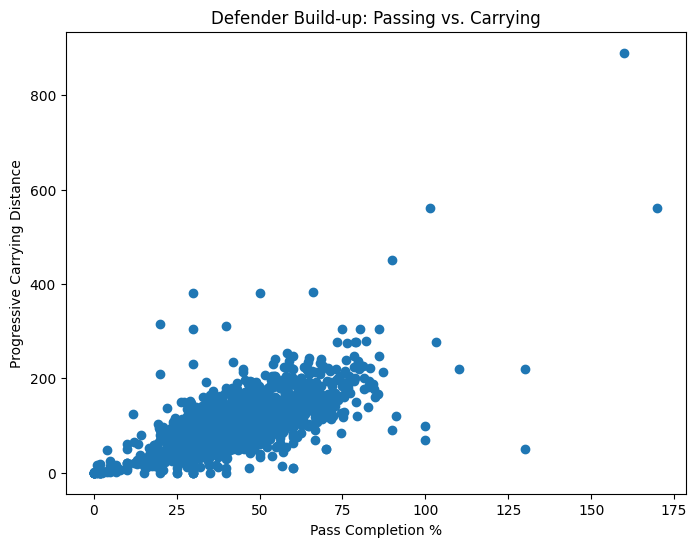

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_defenders['PasTotCmp'], data_defenders['CarPrgDist'])
plt.xlabel('Pass Completion %')
plt.ylabel('Progressive Carrying Distance')
plt.title('Defender Build-up: Passing vs. Carrying')
plt.show()

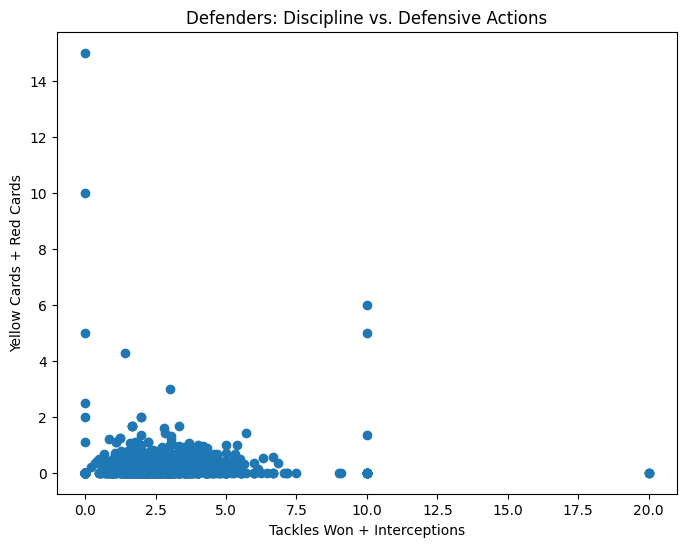

In [ ]:
# Defender decipline visualization
plt.figure(figsize=(8, 6))
plt.scatter(data_defenders['TklWon'] + data_defenders['Int'], data_defenders['CrdY'] + data_defenders['CrdR'])
plt.xlabel('Tackles Won + Interceptions')
plt.ylabel('Yellow Cards + Red Cards')
plt.title('Defenders: Discipline vs. Defensive Actions')
plt.show()

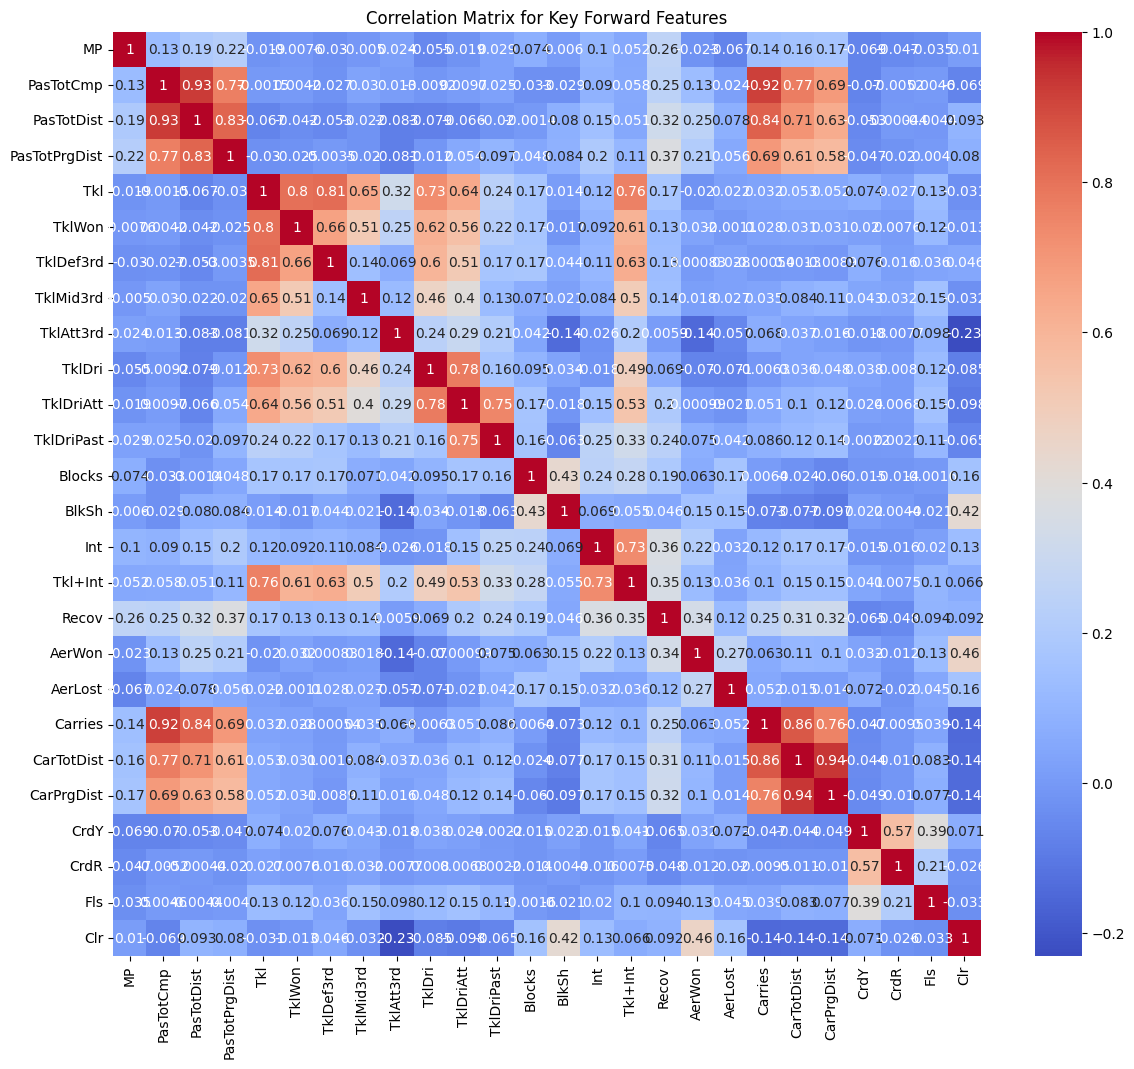

In [ ]:
# Corellation Matrix for Mildfield  features
plt.figure(figsize=(14, 12))
sns.heatmap(data_defenders[defender_features_reduced].corr(), annot=True, cmap='coolwarm')  # 'coolwarm' colormap for visibility
plt.title('Correlation Matrix for Key Forward Features')
plt.show()

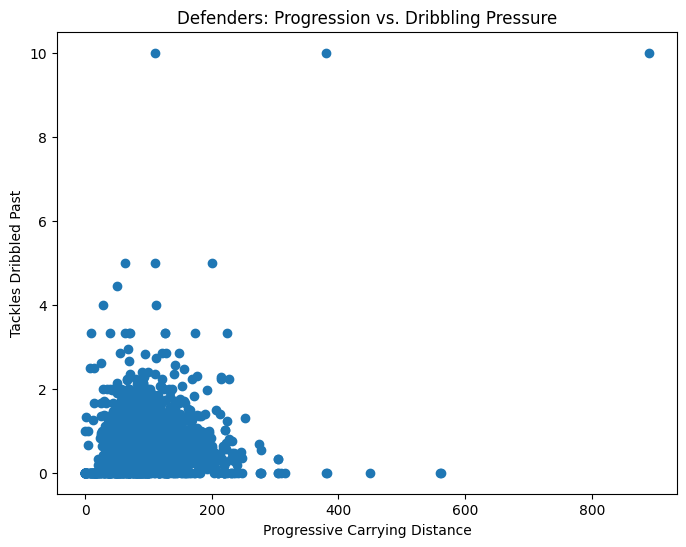

In [ ]:
# Progression with Pressure
plt.figure(figsize=(8, 6))
plt.scatter(data_defenders['CarPrgDist'], data_defenders['TklDriPast'])
plt.xlabel('Progressive Carrying Distance')
plt.ylabel('Tackles Dribbled Past')
plt.title('Defenders: Progression vs. Dribbling Pressure')
plt.show()

In [ ]:
# selecting the features for goals, passses, skills and defence
goals_bestfeatures = ["Goals", "Shots", "SoT"]
passes_bestfeatures = ["PasTotCmp", "Assists"]
skill_bestfeatures = ["SCA", "ScaDrib"]
defense_bestfeatures = ["Tkl", "Int"]

In [ ]:
data_forwards.shape

(1438, 150)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




# Split the data into training and testing sets
X_train_forward, X_test_forward, y_train_forward, y_test_forward = train_test_split(data_forwards[forward_features_reduced], data_forwards[['Goals', 'Assists', 'MP', 'SoT']], test_size=0.2, random_state=42)
X_train_midfielder, X_test_midfielder, y_train_midfielder, y_test_midfielder = train_test_split(data_midfielders[midfielder_features_reduced], data_midfielders[['Assists', 'MP', 'PasTotCmp', 'SCA']], test_size=0.2, random_state=42)
X_train_defender, X_test_defender, y_train_defender, y_test_defender = train_test_split(data_defenders[defender_features_reduced], data_defenders[["MP", "CarPrgDist", "Tkl+Int"]], test_size=0.2, random_state=42)

# Train linear regression models
lr_forward = LinearRegression()
lr_forward.fit(X_train_forward, y_train_forward)

lr_midfielder = LinearRegression()
lr_midfielder.fit(X_train_midfielder, y_train_midfielder)

lr_defender = LinearRegression()
lr_defender.fit(X_train_defender, y_train_defender)

# Train random forest regression models
rf_forward = RandomForestRegressor(n_estimators=100, random_state=42)
rf_forward.fit(X_train_forward, y_train_forward)

rf_midfielder = RandomForestRegressor(n_estimators=100, random_state=42)
rf_midfielder.fit(X_train_midfielder, y_train_midfielder)

rf_defender = RandomForestRegressor(n_estimators=100, random_state=42)
rf_defender.fit(X_train_defender, y_train_defender)

# Predictions
lr_forward_preds = lr_forward.predict(X_test_forward)
rf_forward_preds = rf_forward.predict(X_test_forward)

lr_midfielder_preds = lr_midfielder.predict(X_test_midfielder)
rf_midfielder_preds = rf_midfielder.predict(X_test_midfielder)

lr_defender_preds = lr_defender.predict(X_test_defender)
rf_defender_preds = rf_defender.predict(X_test_defender)

# Evaluation
# Define a function to evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# Evaluate linear regression models
lr_forward_mse, lr_forward_mae, lr_forward_r2 = evaluate_model(y_test_forward, lr_forward_preds)
lr_midfielder_mse, lr_midfielder_mae, lr_midfielder_r2 = evaluate_model(y_test_midfielder, lr_midfielder_preds)
lr_defender_mse, lr_defender_mae, lr_defender_r2 = evaluate_model(y_test_defender, lr_defender_preds)

# Evaluate random forest regression models
rf_forward_mse, rf_forward_mae, rf_forward_r2 = evaluate_model(y_test_forward, rf_forward_preds)
rf_midfielder_mse, rf_midfielder_mae, rf_midfielder_r2 = evaluate_model(y_test_midfielder, rf_midfielder_preds)
rf_defender_mse, rf_defender_mae, rf_defender_r2 = evaluate_model(y_test_defender, rf_defender_preds)

# Print evaluation results
print("Linear Regression Model Evaluation:")
print("Forward - MSE: {:.2f}, MAE: {:.2f}, R^2: {:.2f}".format(lr_forward_mse, lr_forward_mae, lr_forward_r2))
print("Midfielder - MSE: {:.2f}, MAE: {:.2f}, R^2: {:.2f}".format(lr_midfielder_mse, lr_midfielder_mae, lr_midfielder_r2))
print("Defender - MSE: {:.2f}, MAE: {:.2f}, R^2: {:.2f}".format(lr_defender_mse, lr_defender_mae, lr_defender_r2))

print("\nRandom Forest Regression Model Evaluation:")
print("Forward - MSE: {:.2f}, MAE: {:.2f}, R^2: {:.2f}".format(rf_forward_mse, rf_forward_mae, rf_forward_r2))
print("Midfielder - MSE: {:.2f}, MAE: {:.2f}, R^2: {:.2f}".format(rf_midfielder_mse, rf_midfielder_mae, rf_midfielder_r2))
print("Defender - MSE: {:.2f}, MAE: {:.2f}, R^2: {:.2f}".format(rf_defender_mse, rf_defender_mae, rf_defender_r2))


Linear Regression Model Evaluation:
Forward - MSE: 0.16, MAE: 0.10, R^2: 0.83
Midfielder - MSE: 0.00, MAE: 0.00, R^2: 1.00
Defender - MSE: 0.00, MAE: 0.00, R^2: 1.00

Random Forest Regression Model Evaluation:
Forward - MSE: 0.26, MAE: 0.16, R^2: 0.68
Midfielder - MSE: 0.55, MAE: 0.38, R^2: 0.64
Defender - MSE: 5.51, MAE: 0.77, R^2: 0.83


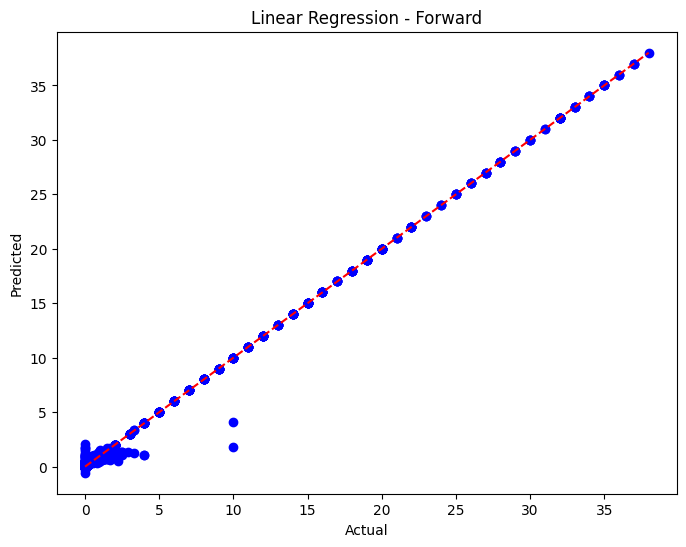

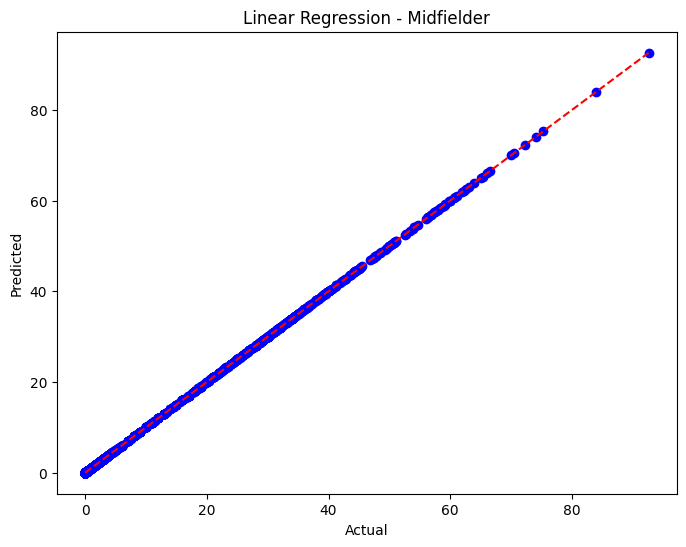

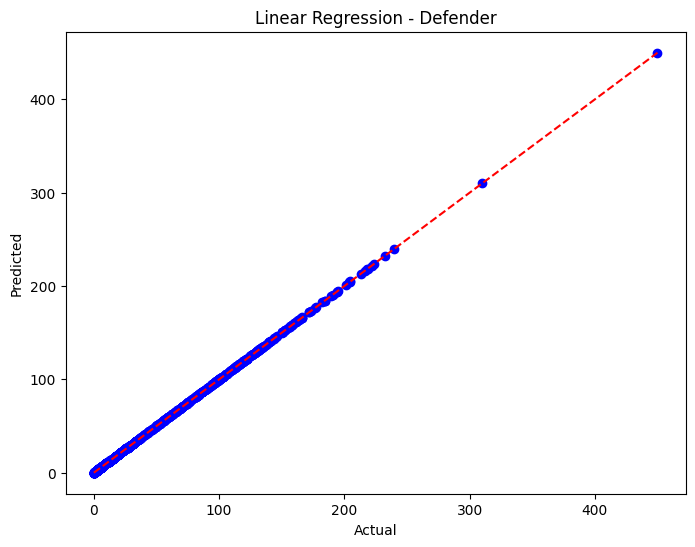

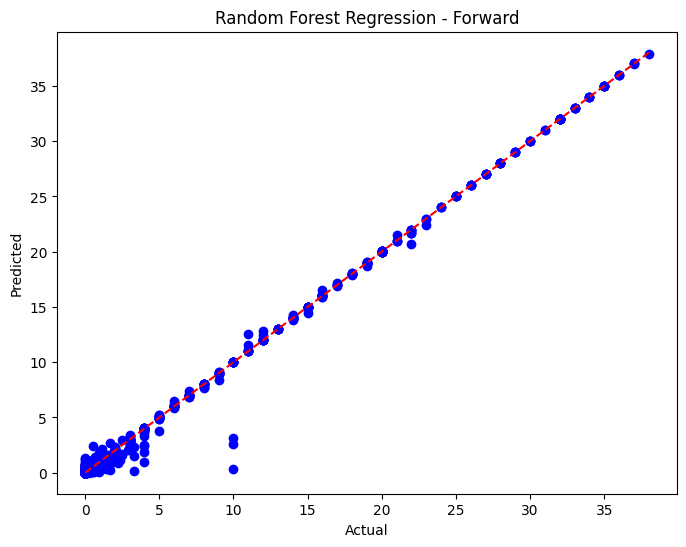

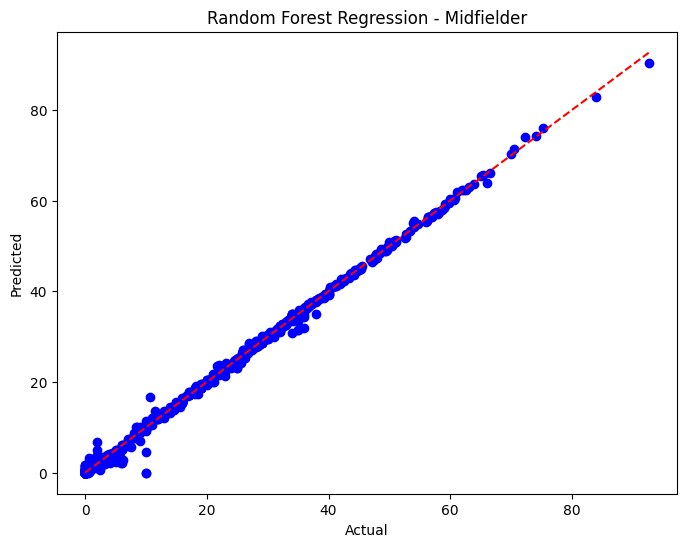

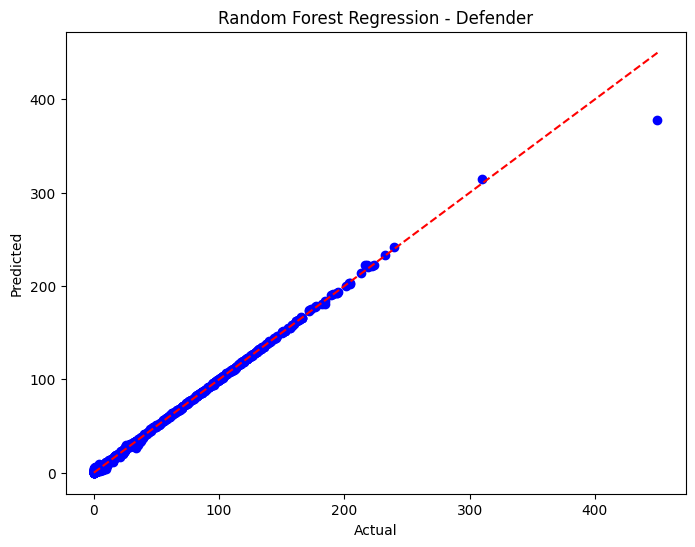

In [ ]:
# Define a function to plot the loss
def plot_loss(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue')
    plt.plot([np.min(y_true), np.max(y_true)], [np.min(y_true), np.max(y_true)], color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

# Plot loss for linear regression models
plot_loss(y_test_forward, lr_forward_preds, 'Linear Regression - Forward')
plot_loss(y_test_midfielder, lr_midfielder_preds, 'Linear Regression - Midfielder')
plot_loss(y_test_defender, lr_defender_preds, 'Linear Regression - Defender')

# Plot loss for random forest regression models
plot_loss(y_test_forward, rf_forward_preds, 'Random Forest Regression - Forward')
plot_loss(y_test_midfielder, rf_midfielder_preds, 'Random Forest Regression - Midfielder')
plot_loss(y_test_defender, rf_defender_preds, 'Random Forest Regression - Defender')

In [ ]:
# Select forward players from the main dataset (assuming 'Position' column contains player positions)
forward_players = data_2022_2023[data_2022_2023['Pos'].isin(forward_position)].sample(5)  # Select any 5 forward players

# Prepare features for prediction
X_pred_forward = forward_players[forward_features_reduced]

# Predict using the trained models
lr_forward_preds_next_season = lr_forward.predict(X_pred_forward)
rf_forward_preds_next_season = rf_forward.predict(X_pred_forward)
# Display predictions for the selected forward players
print("Predictions using Linear Regression For Fowards:")
for i in range(len(forward_players)):
    player = forward_players.iloc[i]
    print("Player: {}, Past Goals: {}, Past Assists: {}, Past SoT: {}, Past MP: {}".format(player['Player'],
                                                                                             player['Goals'],
                                                                                             player['Assists'],
                                                                                             player['SoT'],
                                                                                             player['MP']))
    print("Predicted Goals: {:.2f}, Predicted Assists: {:.2f}, Predicted SoT: {:.2f}, Predicted MP: {:.2f}\n".format(
        lr_forward_preds_next_season[i, 1],
        lr_forward_preds_next_season[i, 0],
        lr_forward_preds_next_season[i, 3],
        lr_forward_preds_next_season[i, 2]))


print("\nPredictions using Random Forest Regression For Fowards:")
for i in range(len(forward_players)):
    player = forward_players.iloc[i]
    print("Player: {}, Past Goals: {}, Past Assists: {}, Past SoT: {}, Past MP: {}".format(player['Player'],
                                                                                             player['Goals'],
                                                                                             player['Assists'],
                                                                                             player['SoT'],
                                                                                             player['MP']))
    print("Predicted Goals: {:.2f}, Predicted Assists: {:.2f}, Predicted SoT: {:.2f}, Predicted MP: {:.2f}\n".format(
        rf_forward_preds_next_season[i, 0],
        rf_forward_preds_next_season[i, 1],
        rf_forward_preds_next_season[i, 3],
        rf_forward_preds_next_season[i, 2]))



Predictions using Linear Regression For Fowards:
Player: Kamaldeen Sulemana, Past Goals: 0, Past Assists: 0.0, Past SoT: 0.67, Past MP: 2
Predicted Goals: -0.00, Predicted Assists: 0.00, Predicted SoT: 0.73, Predicted MP: 2.00

Player: Keane Lewis-Potter, Past Goals: 0, Past Assists: 0.29, Past SoT: 0.59, Past MP: 9
Predicted Goals: 0.29, Predicted Assists: 0.00, Predicted SoT: 0.55, Predicted MP: 9.00

Player: Rafael Borré, Past Goals: 2, Past Assists: 0.36, Past SoT: 0.55, Past MP: 18
Predicted Goals: 0.36, Predicted Assists: 2.00, Predicted SoT: 0.88, Predicted MP: 18.00

Player: Cristiano Ronaldo, Past Goals: 1, Past Assists: 0.0, Past SoT: 1.03, Past MP: 10
Predicted Goals: -0.00, Predicted Assists: 1.00, Predicted SoT: 0.98, Predicted MP: 10.00

Player: Nathan N'Goumou, Past Goals: 0, Past Assists: 0.0, Past SoT: 0.0, Past MP: 1
Predicted Goals: -0.00, Predicted Assists: -0.00, Predicted SoT: 0.12, Predicted MP: 1.00


Predictions using Random Forest Regression For Fowards:
Playe

In [ ]:
# Select midfielder players from the main dataset
midfielder_players = data_2022_2023[data_2022_2023['Pos'].isin(midfield_position)].sample(5)

# Prepare features for prediction
X_pred_midfielder = midfielder_players[midfielder_features_reduced]

# Predict using the trained models
lr_midfielder_preds_next_season = lr_midfielder.predict(X_pred_midfielder)
rf_midfielder_preds_next_season = rf_midfielder.predict(X_pred_midfielder)

# Display predictions for the selected midfielder players
print("Predictions using Linear Regression For Midfielders:")
for i in range(len(midfielder_players)):
    player = midfielder_players.iloc[i]
    print("Player: {}, Past Assists: {}, Past MP: {}, Past PasTotCmp: {}, Past SCA: {}".format(player['Player'],
                                                                                             player['Assists'],
                                                                                             player['MP'],
                                                                                             player['SCA'],
                                                                                             player['PasTotCmp']))
    print("Predicted Assists: {:.2f}, Predicted MP: {:.2f}, Predicted SCA: {:.2f}, Predicted PasTotCmp: {:.2f}\n".format(
        lr_midfielder_preds_next_season[i, 0],
        lr_midfielder_preds_next_season[i, 1],
        lr_midfielder_preds_next_season[i, 3],
        lr_midfielder_preds_next_season[i, 2]))

print("\nPredictions using Random Forest Regression For Midfielders:")
for i in range(len(midfielder_players)):
    player = midfielder_players.iloc[i]
    print("Player: {}, Past Assists: {}, Past MP: {}, Past PasTotCmp: {}, Past SCA: {}".format(player['Player'],
                                                                                             player['Assists'],
                                                                                             player['MP'],
                                                                                             player['SCA'],
                                                                                             player['PasTotCmp']))
    print("Predicted Assists: {:.2f}, Predicted MP: {:.2f}, Predicted SCA: {:.2f}, Predicted PasTotCmp: {:.2f}\n".format(
        rf_midfielder_preds_next_season[i, 0],
        rf_midfielder_preds_next_season[i, 1],
        rf_midfielder_preds_next_season[i, 3],
        rf_midfielder_preds_next_season[i, 2]))


Predictions using Linear Regression For Midfielders:
Player: Felix Kalu Nmecha, Past Assists: 0.31, Past MP: 16, Past PasTotCmp: 2.4, Past SCA: 21.8
Predicted Assists: 0.31, Predicted MP: 16.00, Predicted SCA: 2.40, Predicted PasTotCmp: 21.80

Player: Roberto Piccoli, Past Assists: 0.0, Past MP: 2, Past PasTotCmp: 0.0, Past SCA: 8.57
Predicted Assists: -0.00, Predicted MP: 2.00, Predicted SCA: 0.00, Predicted PasTotCmp: 8.57

Player: Manu Morlanes, Past Assists: 0.0, Past MP: 4, Past PasTotCmp: 1.11, Past SCA: 20.0
Predicted Assists: -0.00, Predicted MP: 4.00, Predicted SCA: 1.11, Predicted PasTotCmp: 20.00

Player: Orel Mangala, Past Assists: 0.0, Past MP: 14, Past PasTotCmp: 1.17, Past SCA: 28.8
Predicted Assists: -0.00, Predicted MP: 14.00, Predicted SCA: 1.17, Predicted PasTotCmp: 28.80

Player: Ruben Vargas, Past Assists: 0.18, Past MP: 12, Past PasTotCmp: 1.79, Past SCA: 13.4
Predicted Assists: 0.18, Predicted MP: 12.00, Predicted SCA: 1.79, Predicted PasTotCmp: 13.40


Predictio

In [ ]:
# Select defender players from the main dataset
defender_players = data_2022_2023[data_2022_2023['Pos'].isin(defender_position)].sample(5)

# Prepare features for prediction
X_pred_defender = defender_players[defender_features_reduced]

# Predict using the trained models
lr_defender_preds_next_season = lr_defender.predict(X_pred_defender)
rf_defender_preds_next_season = rf_defender.predict(X_pred_defender)

# Display predictions for the selected defender players using linear regression
print("Predictions using Linear Regression For Defenders:")
for i in range(len(defender_players)):
    player = defender_players.iloc[i]
    print("Player: {}, Past MP: {}, Past CarPrgDist: {}, Past Tkl+Int: {}".format(player['Player'],
                                                                                   player['MP'],
                                                                                   player['CarPrgDist'],
                                                                                   player['Tkl+Int']))
    print("Predicted MP: {:.2f}, Predicted CarPrgDist: {:.2f}, Predicted Tkl+Int: {:.2f}\n".format(
        lr_defender_preds_next_season[i, 0],
        lr_defender_preds_next_season[i, 1],
        lr_defender_preds_next_season[i, 2]))

# Display predictions for the selected defender players using random forest regression
print("\nPredictions using Random Forest Regression For Defenders:")
for i in range(len(defender_players)):
    player = defender_players.iloc[i]
    print("Player: {}, Past MP: {}, Past CarPrgDist: {}, Past Tkl+Int: {}".format(player['Player'],
                                                                                   player['MP'],
                                                                                   player['CarPrgDist'],
                                                                                   player['Tkl+Int']))
    print("Predicted MP: {:.2f}, Predicted CarPrgDist: {:.2f}, Predicted Tkl+Int: {:.2f}\n".format(
        rf_defender_preds_next_season[i, 0],
        rf_defender_preds_next_season[i, 1],
        rf_defender_preds_next_season[i, 2]))


Predictions using Linear Regression For Defenders:
Player: Youssouf Koné, Past MP: 7, Past CarPrgDist: 79.1, Past Tkl+Int: 4.83
Predicted MP: 7.00, Predicted CarPrgDist: 79.10, Predicted Tkl+Int: 4.83

Player: Álex Moreno, Past MP: 15, Past CarPrgDist: 99.7, Past Tkl+Int: 3.07
Predicted MP: 15.00, Predicted CarPrgDist: 99.70, Predicted Tkl+Int: 3.07

Player: Youssouf Sabaly, Past MP: 14, Past CarPrgDist: 95.4, Past Tkl+Int: 3.15
Predicted MP: 14.00, Predicted CarPrgDist: 95.40, Predicted Tkl+Int: 3.15

Player: David ?olina, Past MP: 3, Past CarPrgDist: 47.1, Past Tkl+Int: 7.14
Predicted MP: 3.00, Predicted CarPrgDist: 47.10, Predicted Tkl+Int: 7.14

Player: Makoto Hasebe, Past MP: 6, Past CarPrgDist: 122.1, Past Tkl+Int: 2.56
Predicted MP: 6.00, Predicted CarPrgDist: 122.10, Predicted Tkl+Int: 2.56


Predictions using Random Forest Regression For Defenders:
Player: Youssouf Koné, Past MP: 7, Past CarPrgDist: 79.1, Past Tkl+Int: 4.83
Predicted MP: 6.64, Predicted CarPrgDist: 79.09, Pred